# Importando bibliotecas

In [1]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Importando dataset
df = pd.read_excel('consumo_de_cerveja.xlsx')

In [3]:
df.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,23.9,27.30,32.5,0.0,0,25.461
1,24.5,27.02,33.5,0.0,0,28.972
2,22.4,24.82,29.9,0.0,1,30.814
3,21.5,23.98,28.6,1.2,1,29.799
4,21.0,23.82,28.3,0.0,0,28.900


# Análise exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Minima (C)       365 non-null    float64
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


In [5]:
#Verificando as correlações entre as variáveis
df_corr = df.corr(method = 'pearson')
df_corr

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Minima (C),1.000000,0.862752,0.672929,0.098625,-0.059534,0.392509
Temperatura Media (C),0.862752,1.000000,0.922513,0.024416,-0.050803,0.574615
Temperatura Maxima (C),0.672929,0.922513,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.098625,0.024416,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.059534,-0.050803,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.392509,0.574615,0.642672,-0.193784,0.505981,1.000000


<AxesSubplot:>

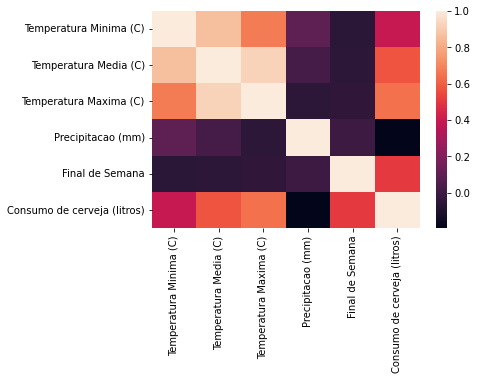

In [6]:
#Verificando o heatmap de correlação entre as variáveis 
sns.heatmap(df_corr)

In [7]:
#Verificando os valores mínimos da variável "Temperatura Minima"
df[['Temperatura Minima (C)']].min()

Temperatura Minima (C)    10.6
dtype: float64

In [8]:
#Verificando os valores mínimos da variável "Temperatura Maxima"
df[['Temperatura Maxima (C)']].max()

Temperatura Maxima (C)    36.5
dtype: float64

E:\Arquivos de Programas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperatura Media (C)', ylabel='Density'>

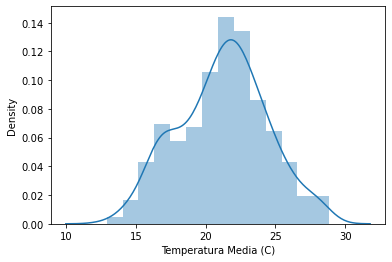

In [9]:
#Plotando a distribuição da varíavel "Temperatura Media"
sns.distplot(df['Temperatura Media (C)'])

<AxesSubplot:xlabel='Precipitacao (mm)', ylabel='Consumo de cerveja (litros)'>

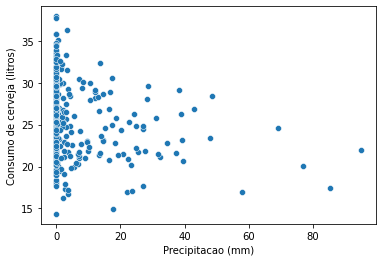

In [10]:
#Plotando a dispersão da varíavel "Precipitacao" em relação a variável "Consumo de Cerveja"
sns.scatterplot(data=df, x="Precipitacao (mm)", y="Consumo de cerveja (litros)")

<AxesSubplot:xlabel='Temperatura Maxima (C)', ylabel='Consumo de cerveja (litros)'>

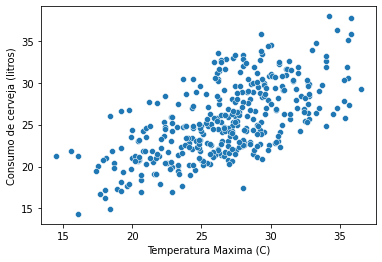

In [11]:
#Plotando a dispersão da varíavel "Temperatura Maxima" em relação a variável "Consumo de Cerveja"
sns.scatterplot(data=df, x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)")

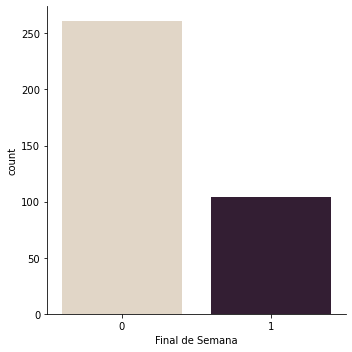

In [12]:
#Plotando a distribuição da varíavel "Final de Semana"
sns.catplot(x="Final de Semana", kind="count", palette="ch:.25", data=df)

# Treinando modelo (fit)

In [13]:
#Importando modelo da Regressão Linear no sklearn
from sklearn.linear_model import LinearRegression

In [14]:
#Separando X e Y
x = df.drop('Consumo de cerveja (litros)', axis=1)
y = df[['Consumo de cerveja (litros)']]

In [15]:
x.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,23.9,27.30,32.5,0.0,0
1,24.5,27.02,33.5,0.0,0
2,22.4,24.82,29.9,0.0,1
3,21.5,23.98,28.6,1.2,1
4,21.0,23.82,28.3,0.0,0


In [16]:
y.head()

,Consumo de cerveja (litros)
0,25.461
1,28.972
2,30.814
3,29.799
4,28.900


In [17]:
#Fittando o modelo
reg = LinearRegression().fit(x, y)

# Operando com o modelo (predict)

In [18]:
#Importando o dataset de teste
df_test = pd.read_excel('consumo_de_cerveja_to_predict.xlsx')

In [19]:
df_test.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,18.6,21.92,25.6,24.2,0,NaN
1,19.7,21.24,24.1,0.0,0,NaN
2,19.2,21.78,27.1,3.2,0,NaN
3,18.9,21.64,28.2,7.4,0,NaN
4,18.5,20.88,25.3,14.7,1,NaN


In [20]:
#Separando X e Y
x_test = df_test.drop('Consumo de cerveja (litros)', axis=1)

In [21]:
x_test.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,18.6,21.92,25.6,24.2,0
1,19.7,21.24,24.1,0.0,0
2,19.2,21.78,27.1,3.2,0
3,18.9,21.64,28.2,7.4,0
4,18.5,20.88,25.3,14.7,1


In [22]:
#Opeando Modelo
predict = reg.predict(x_test)

In [23]:
predict

array([[22.16854663],
       [22.53342511],
       [24.34367244],
       [24.82530096],
       [27.67076233],
       [26.74913756],
       [20.91282116]])

# Exportando dados de volta para o Excel

In [24]:
x_test['Consumo de cerveja (litros)'] = predict

In [25]:
x_test.head()

,Temperatura Minima (C),Temperatura Media (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,18.6,21.92,25.6,24.2,0,22.168547
1,19.7,21.24,24.1,0.0,0,22.533425
2,19.2,21.78,27.1,3.2,0,24.343672
3,18.9,21.64,28.2,7.4,0,24.825301
4,18.5,20.88,25.3,14.7,1,27.670762


In [26]:
x_test.to_excel("consumo_de_cerveja_to_predict.xlsx", index = False)